<a href="https://colab.research.google.com/github/DanielHolzwart/MNIST/blob/main/MNIST_classic_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
%cd /content/drive/MyDrive/Kaggle/MNIST

Mounted at /content/drive
/content/drive/MyDrive/Kaggle/MNIST


In [ ]:
!kaggle competitions download -c digit-recognizer

 78% 12.0M/15.3M [00:00<00:00, 21.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 16.2MB/s]


In [ ]:
import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

In [2]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('train.csv')

In [3]:
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = X_train['label']
X_train = X_train.drop('label', axis = 1)
len(X_train)

42000

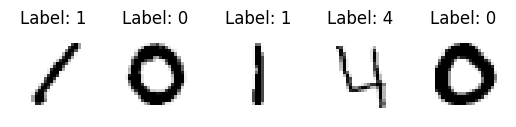

In [5]:
#plot a few images (five)
import matplotlib.pyplot as plt
rng_plt = range(5)
for i in rng_plt:
  digit = X_train.loc[i].to_numpy().reshape(28,28)
  plt.subplot(1,len(rng_plt),i+1)
  plt.imshow(digit,cmap= plt.cm.binary)
  plt.axis('off')
  plt.title(f'Label: {y_train[i]}')

plt.show()

In [6]:
#let us now split the data into a test and validation set. The following code overwrites the training set
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2,shuffle = True, random_state = 1)
print(f'Length of train set {len(X_train)} and length of validation set {len(X_valid)}')

Length of train set 33600 and length of validation set 8400


In [7]:
#we will try out different classifiers: SGD, RandomForestClassifier, KNearestNeighbour from sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

sgd_clf = SGDClassifier()
forest_clf = RandomForestClassifier()
neighbors_clf = KNeighborsClassifier()

In [8]:
#fit the classifier to the training set
sgd_clf.fit(X_train,y_train)
forest_clf.fit(X_train,y_train)
neighbors_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [10]:
#predict on the validation set. We start with SGD
y_pred_sgd = sgd_clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_sgd))
print(precision_score(y_train,y_pred_sgd,average = 'micro'))

[[3182    0    6    3    3   31    6    3   26   19]
 [   0 3290   32    5    1   25    4    6  272  109]
 [  15   10 2967   15   12   54   11   55  171   32]
 [  10    1   94 2617    2  405    4   41  230   74]
 [   5    3   37    4 2704   37    5   20   95  333]
 [  13    0   18   16   18 2855   11    6   87   40]
 [  31    2   91    2   10  138 2943    3   88   29]
 [   3    0   29    1   15   16    1 3319   16  151]
 [   7    9   23   19    4  296    3   13 2749   94]
 [   4    1    8   19   27   90    0  135   59 3002]]
0.8817857142857143


In [11]:
#RandomForest
y_pred_forest = forest_clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_forest))
print(precision_score(y_train,y_pred_forest,average = 'micro'))

[[3279    0    0    0    0    0    0    0    0    0]
 [   0 3744    0    0    0    0    0    0    0    0]
 [   0    0 3342    0    0    0    0    0    0    0]
 [   0    0    0 3478    0    0    0    0    0    0]
 [   0    0    0    0 3243    0    0    0    0    0]
 [   0    0    0    0    0 3064    0    0    0    0]
 [   0    0    0    0    0    0 3337    0    0    0]
 [   0    0    0    0    0    0    0 3551    0    0]
 [   0    0    0    0    0    0    0    0 3217    0]
 [   0    0    0    0    0    0    0    0    0 3345]]
1.0


In [12]:
#nearest neighbors
y_pred_neighbors = neighbors_clf.predict(X_train)
print(confusion_matrix(y_train, y_pred_neighbors))
print(precision_score(y_train,y_pred_neighbors,average = 'micro'))

[[3265    1    2    0    0    3    7    0    0    1]
 [   0 3727    4    1    1    0    2    6    1    2]
 [  19   23 3249    3    0    1    2   38    4    3]
 [   1    7   13 3408    1   15    0   16    9    8]
 [   3   32    0    0 3161    0    6    1    0   40]
 [   6    2    1   22    2 2992   25    1    3   10]
 [   8    4    1    0    3   14 3307    0    0    0]
 [   2   39    5    0    5    0    0 3476    0   24]
 [   8   26    6   34   11   40    7    5 3055   25]
 [   8    6    4   20   22    5    2   32    4 3242]]
0.9786309523809524


At first glance it look like RandomForest is badly overfitting the training data. Let us check that with the validation set

In [13]:
y_pred_forest_valid = forest_clf.predict(X_valid)
print(confusion_matrix(y_valid, y_pred_forest_valid))
print(precision_score(y_valid,y_pred_forest_valid,average = 'micro'))

[[845   0   3   0   1   1   2   0   1   0]
 [  0 925   6   7   0   0   1   0   1   0]
 [  2   2 808   4   3   0   2   8   5   1]
 [  1   0  16 822   1  12   0   5  10   6]
 [  0   1   2   0 809   0   2   4   1  10]
 [  5   1   1  13   0 697   3   1   6   4]
 [  1   0   1   0   4   3 789   0   2   0]
 [  0   1  13   0   5   0   0 816   1  14]
 [  1   5   0   6   4   8   3   1 812   6]
 [  2   2   0   7  17   4   0   9   8 794]]
0.9663095238095238


As the validation set has a lot lower precision score, our guess is indeed true. How is KNeighbors performing on the validation set?

In [14]:
y_pred_neighbors_valid = neighbors_clf.predict(X_valid)
print(confusion_matrix(y_valid, y_pred_neighbors_valid))
print(precision_score(y_valid,y_pred_neighbors_valid,average = 'micro'))

[[847   0   1   0   0   2   2   1   0   0]
 [  0 937   1   0   0   0   1   1   0   0]
 [  3  14 796   0   0   0   1  16   4   1]
 [  2   3   7 838   0  14   0   3   3   3]
 [  0   4   0   0 806   0   0   1   0  18]
 [  2   2   1  12   0 704   8   0   0   2]
 [  2   0   0   0   2   4 792   0   0   0]
 [  0  10   3   0   1   0   0 827   0   9]
 [  4  19   1  15   4  16   6   3 772   6]
 [  4   1   0   6   5   1   0  20   1 805]]
0.9671428571428572


This result is much closer to the test on the training set. Let us investigate it further.

Looking at the confusion matrix, there are 20 9's on the validation set that get classified as a 7.

In [15]:
X_valid[(y_valid == 9).to_numpy() & (y_pred_neighbors_valid == 7)].shape

(20, 784)

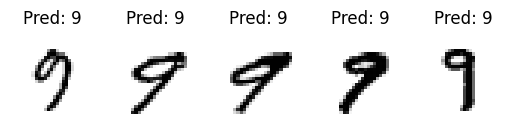

In [20]:
#plot a five of those wrongly predicted digits
rng_plt = range(5)
for i in rng_plt:
  wrongs = X_valid[(y_valid == 9).to_numpy() & (y_pred_neighbors_valid == 7)][i:(i+1)].to_numpy().reshape(28,28)
  plt.subplot(1,len(rng_plt),i+1)
  plt.imshow(wrongs,cmap= plt.cm.binary)
  plt.axis('off')
  plt.title('Pred: 9')

plt.show()

Honestly, the don't look like 7's at all, so our algorith does not perform as good as expected. the next steps would be to try grid searchs for the optimal paramters, get more training data or simply augment data to have more training data.

As a supplementary we want to emphasize where KNeighbors performs worst in a heat diagram

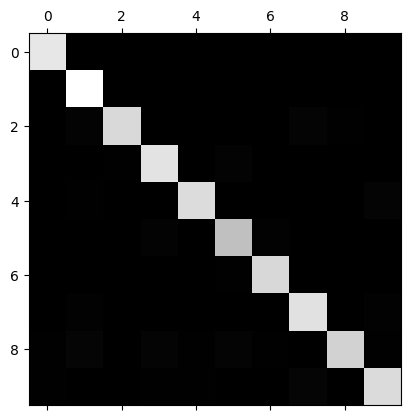

In [21]:
conf_mx = confusion_matrix(y_valid, y_pred_neighbors_valid)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

The diagonals are clearly the brightest. Therefore, we replace the diagonal by 0. For better visualization, let us look at a heat map instead of a grey scale. The following pictures gives a nice visualization of the False Negatives and False Positives. Remember that the real labels are on the y and the predicted ones on the x axis.

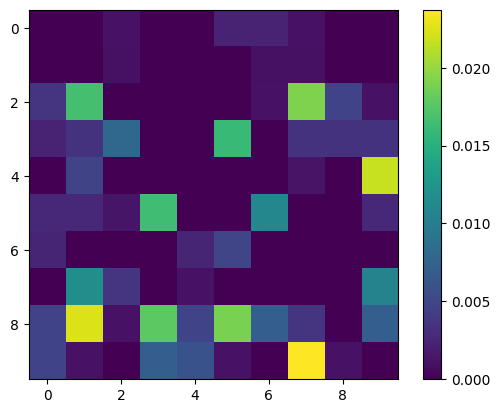

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
import seaborn as sns

np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx, cmap='viridis')
plt.colorbar()
plt.show()